## LASSO stands for Least Absolute Shrinkage and Selection Operator.
### LASSO regression, also known as L1 regularization, is a popular technique used in statistical modeling and machine learning to estimate the relationships between variables and make predictions. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('Hyderabad.csv')
data.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,6968000,1340,Nizampet,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
1,29000000,3498,Hitech City,4,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,6590000,1318,Manikonda,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5739000,1295,Alwal,3,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,5679000,1145,Kukatpally,2,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [3]:
data.shape

(2518, 40)

In [4]:
data.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,6968000,1340,Nizampet,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
1,29000000,3498,Hitech City,4,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,6590000,1318,Manikonda,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5739000,1295,Alwal,3,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,5679000,1145,Kukatpally,2,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Price                2518 non-null   int64 
 1   Area                 2518 non-null   int64 
 2   Location             2518 non-null   object
 3   No. of Bedrooms      2518 non-null   int64 
 4   Resale               2518 non-null   int64 
 5   MaintenanceStaff     2518 non-null   int64 
 6   Gymnasium            2518 non-null   int64 
 7   SwimmingPool         2518 non-null   int64 
 8   LandscapedGardens    2518 non-null   int64 
 9   JoggingTrack         2518 non-null   int64 
 10  RainWaterHarvesting  2518 non-null   int64 
 11  IndoorGames          2518 non-null   int64 
 12  ShoppingMall         2518 non-null   int64 
 13  Intercom             2518 non-null   int64 
 14  SportsFacility       2518 non-null   int64 
 15  ATM                  2518 non-null   int64 
 16  ClubHo

In [6]:
data.describe()

,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
count,2.518000e+03,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,...,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000
mean,9.818380e+06,1644.571088,2.623511,0.227562,0.412629,0.739873,0.709690,0.619142,0.559968,0.606434,...,0.975774,0.360207,0.607228,0.342732,0.330024,0.321287,0.334392,0.342335,0.341144,0.324861
std,8.777113e+06,746.256956,0.687330,0.419341,1.626445,1.611024,1.615231,1.624426,1.627686,1.625308,...,1.557725,1.622778,1.625256,1.621178,1.619894,1.618953,1.620347,1.621139,1.621023,1.619344
min,2.000000e+06,500.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.760000e+06,1160.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.754000e+06,1500.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.090000e+07,1829.000000,3.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.650000e+08,9400.000000,8.000000,1.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


In [7]:
data.isnull().sum()

Price                  0
Area                   0
Location               0
No. of Bedrooms        0
Resale                 0
MaintenanceStaff       0
Gymnasium              0
SwimmingPool           0
LandscapedGardens      0
JoggingTrack           0
RainWaterHarvesting    0
IndoorGames            0
ShoppingMall           0
Intercom               0
SportsFacility         0
ATM                    0
ClubHouse              0
School                 0
24X7Security           0
PowerBackup            0
CarParking             0
StaffQuarter           0
Cafeteria              0
MultipurposeRoom       0
Hospital               0
WashingMachine         0
Gasconnection          0
AC                     0
Wifi                   0
Children'splayarea     0
LiftAvailable          0
BED                    0
VaastuCompliant        0
Microwave              0
GolfCourse             0
TV                     0
DiningTable            0
Sofa                   0
Wardrobe               0
Refrigerator           0


### Feature scaling

In [8]:
data['Area']=np.log1p(data['Area'])

In [9]:
data['Price']=np.log1p(data['Price'])

### Model training

In [10]:
x=data.drop(["Price","Location"],axis=1)
y=data["Price"]

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

### Lasso regression

In [19]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

# Define a range of alpha values to search over
alphas = [0.01, 0.1, 1.0, 10.0]  # You can expand this range as needed

# Create a Lasso regression model
lasso_model = Lasso()

# Define hyperparameters to tune
param_grid = {'alpha': alphas}

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=lasso_model, param_grid=param_grid, scoring='r2', cv=5)
grid_search.fit(x_train, y_train)

# Get the best R-squared score and corresponding alpha value
best_r2 = grid_search.best_score_
best_alpha = grid_search.best_params_['alpha']

# Evaluates the model using mean squared error.
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

print(f'Best R-squared: {best_r2}')
print(f'Best alpha: {best_alpha}')


Mean Squared Error: 0.28089270515751624
Best R-squared: 0.769226474321497
Best alpha: 0.01


In [13]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error

# Creates and trains a Lasso regression model with a specified regularization strength (alpha).
lasso_model = Lasso(alpha=0.01)  # You can adjust the alpha parameter for regularization strength,
lasso_model.fit(x_train, y_train)

# Make predictions on the test set.
y_pred = lasso_model.predict(x_test)

# Evaluates the model using mean squared error.
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared (R2): {r2_score(y_test, y_pred)}')


Mean Squared Error: 0.08854589685756661
R-squared (R2): 0.7652536255031812


<Axes: xlabel='Price', ylabel='Count'>

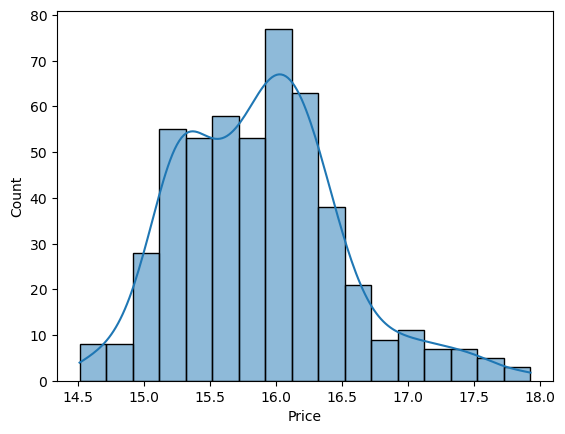

In [20]:
sns.histplot(y_test,kde='True')

In [16]:
import joblib
joblib.dump(data,'lasso.joblib')

['lasso.joblib']